In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from collections import defaultdict


In [66]:
data = pd.read_csv('calles_de_medellin_con_acoso.csv',sep=';')
data.isna().sum()

name              23559
origin                0
destination           0
length                0
oneway                0
harassmentRisk    16091
geometry              0
dtype: int64

In [67]:
data['harassmentRisk'].fillna(data['harassmentRisk'].mean(), inplace = True)

In [5]:
data.isna().sum()

name              23559
origin                0
destination           0
length                0
oneway                0
harassmentRisk        0
geometry              0
dtype: int64

In [5]:
data['harassmentRisk'].mean()

0.8435078086513182

In [8]:
data.head()

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True,0.526539,"LINESTRING (-75.5728593 6.2115169, -75.5724984..."
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True,0.414356,"LINESTRING (-75.5705202 6.2106275, -75.570427 ..."
2,Carrera 43A,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,True,0.526539,"LINESTRING (-75.5705202 6.2106275, -75.5705604..."
3,Carrera 41,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,True,0.302173,"LINESTRING (-75.5687719 6.2099661, -75.5688021..."
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True,0.302173,"LINESTRING (-75.5687719 6.2099661, -75.568715 ..."


In [68]:
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data)

area = pd.read_csv('poligono_de_medellin.csv',sep=';')
area['geometry'] = area['geometry'].apply(wkt.loads)
area = gpd.GeoDataFrame(area)

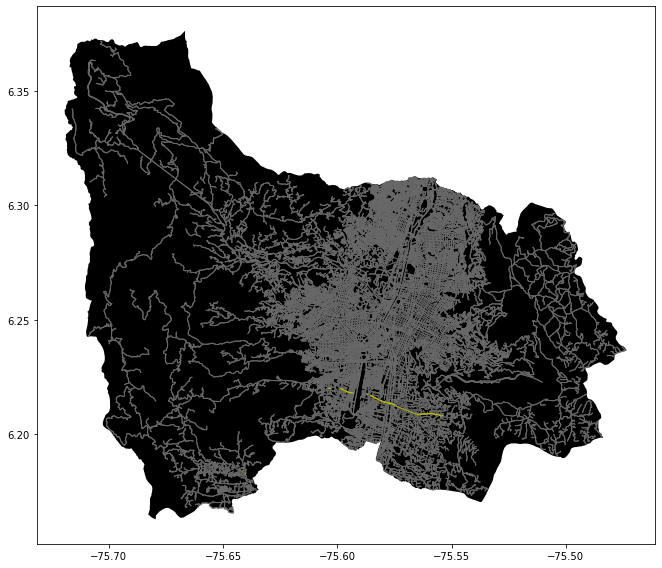

In [73]:
#Create plot
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street data
data.plot(ax=ax, linewidth=1, edgecolor='dimgray')

calle10.plot(ax=ax, linewidth=1, edgecolor='y')

plt.tight_layout()
plt.show()

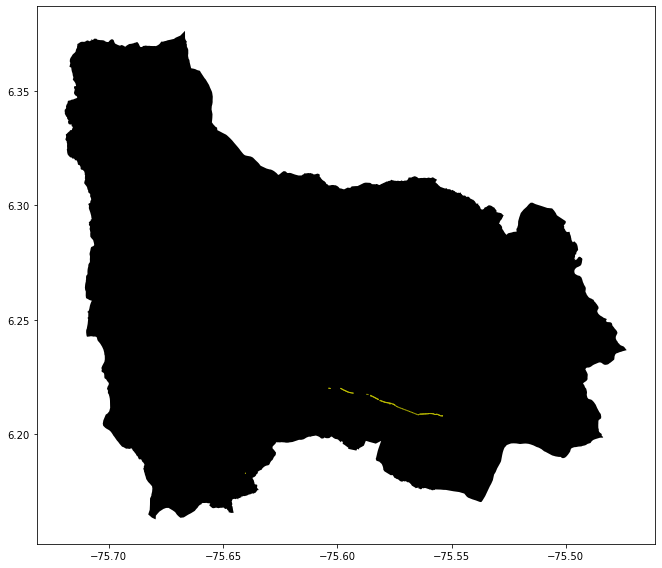

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
calle10 = data[data['name'] == 'Calle 10']
area.plot(ax=ax, facecolor='black')

calle10.plot(ax=ax, linewidth=1, edgecolor='y')
plt.tight_layout()
plt.show()

In [11]:
data.columns

Index(['name', 'origin', 'destination', 'length', 'oneway', 'harassmentRisk',
       'geometry'],
      dtype='object')

In [12]:
nodos = data[['origin', 'destination', 'length', 'oneway']]
nodos.head()

,origin,destination,length,oneway
0,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True
1,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True
2,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,True
3,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,True
4,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True


In [9]:
data[data['name'] == 'Calle 10']

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True,0.526539,"LINESTRING (-75.57286 6.21152, -75.57250 6.21138)"
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True,0.414356,"LINESTRING (-75.57052 6.21063, -75.57043 6.21059)"
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True,0.302173,"LINESTRING (-75.56877 6.20997, -75.56871 6.20994)"
5,Calle 10,"(-75.5674348, 6.2094357)","(-75.5673776, 6.2094125)",6.829,True,0.302173,"LINESTRING (-75.56743 6.20944, -75.56738 6.20941)"
6,Calle 10,"(-75.5666527, 6.2091202)","(-75.566565, 6.2090881)",10.331,True,0.302173,"LINESTRING (-75.56665 6.20912, -75.56656 6.20909)"
...,...,...,...,...,...,...,...
61399,Calle 10,"(-75.5597199, 6.2089413)","(-75.5597025, 6.2089442)",1.950,False,0.302173,"LINESTRING (-75.55972 6.20894, -75.55970 6.20894)"
61400,Calle 10,"(-75.5597199, 6.2089413)","(-75.5604701, 6.2088523)",83.535,False,0.302173,"LINESTRING (-75.55972 6.20894, -75.56008 6.208..."
62035,Calle 10,"(-75.5810225, 6.2144778)","(-75.5802552, 6.214197)",90.383,True,0.893225,"LINESTRING (-75.58102 6.21448, -75.58036 6.214..."
64991,Calle 10,"(-75.5775045, 6.2135995)","(-75.5787242, 6.2138248)",137.136,True,0.709882,"LINESTRING (-75.57750 6.21360, -75.57872 6.21382)"


In [10]:
data[data['origin'] == '(-75.5724985, 6.2113756)']

,name,origin,destination,length,oneway,harassmentRisk,geometry
7315,Carrera 43D,"(-75.5724985, 6.2113756)","(-75.5720978, 6.2122939)",111.304,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57210 6.21229)"
7316,Calle 10,"(-75.5724985, 6.2113756)","(-75.5719919, 6.2111787)",60.129,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57199 6.21118)"


In [56]:
prueba = data['origin'] == '(-75.5724985, 6.2113756)'
data.loc[prueba]

,name,origin,destination,length,oneway,harassmentRisk,geometry
7315,Carrera 43D,"(-75.5724985, 6.2113756)","(-75.5720978, 6.2122939)",111.304,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57210 6.21229)"
7316,Calle 10,"(-75.5724985, 6.2113756)","(-75.5719919, 6.2111787)",60.129,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57199 6.21118)"


In [13]:
data.iloc[6]

name                                                       Calle 10
origin                                     (-75.5666527, 6.2091202)
destination                                 (-75.566565, 6.2090881)
length                                                       10.331
oneway                                                         True
harassmentRisk                                             0.302173
geometry          LINESTRING (-75.56665270000001 6.2091202, -75....
Name: 6, dtype: object

In [23]:
doble_sentido = data.rename(columns ={'origin': 'destino','destination': 'origen' })
doble_sentido = doble_sentido[doble_sentido['oneway'] == True]
doble_sentido = doble_sentido.rename(columns = {'destino': 'destination', 'origen': 'origin'})
doble_sentido = doble_sentido[['name', 'origin', 'destination', 'length', 'oneway', 'harassmentRisk',
       'geometry']]
doble_sentido

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5724985, 6.2113756)","(-75.5728593, 6.2115169)",42.867,True,0.526539,"LINESTRING (-75.57286 6.21152, -75.57250 6.21138)"
1,Calle 10,"(-75.570427, 6.2105879)","(-75.5705202, 6.2106275)",11.204,True,0.414356,"LINESTRING (-75.57052 6.21063, -75.57043 6.21059)"
2,Carrera 43A,"(-75.5705604, 6.2105262)","(-75.5705202, 6.2106275)",12.109,True,0.526539,"LINESTRING (-75.57052 6.21063, -75.57056 6.21053)"
3,Carrera 41,"(-75.5688022, 6.2098867)","(-75.5687719, 6.2099661)",9.443,True,0.302173,"LINESTRING (-75.56877 6.20997, -75.56880 6.20989)"
4,Calle 10,"(-75.568715, 6.2099443)","(-75.5687719, 6.2099661)",6.741,True,0.302173,"LINESTRING (-75.56877 6.20997, -75.56871 6.20994)"
...,...,...,...,...,...,...,...
68713,Calle 50,"(-75.5794075, 6.2553331)","(-75.5792919, 6.2552754)",14.298,True,0.862324,"LINESTRING (-75.57929 6.25528, -75.57941 6.25533)"
68720,Carrera 64B,"(-75.5797083, 6.254806)","(-75.5794986, 6.2551708)",46.719,True,0.903921,"LINESTRING (-75.57950 6.25517, -75.57971 6.25481)"
68723,Carrera 64B,"(-75.5794187, 6.2551834)","(-75.5794398, 6.2551445)",4.914,True,0.903921,"LINESTRING (-75.57944 6.25514, -75.57942 6.25518)"
68735,Carrera 64,"(-75.5774528, 6.2560935)","(-75.5774308, 6.2561365)",5.364,True,0.862324,"LINESTRING (-75.57743 6.25614, -75.57745 6.25609)"


In [25]:
data.head()

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True,0.526539,"LINESTRING (-75.57286 6.21152, -75.57250 6.21138)"
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True,0.414356,"LINESTRING (-75.57052 6.21063, -75.57043 6.21059)"
2,Carrera 43A,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,True,0.526539,"LINESTRING (-75.57052 6.21063, -75.57056 6.21053)"
3,Carrera 41,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,True,0.302173,"LINESTRING (-75.56877 6.20997, -75.56880 6.20989)"
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True,0.302173,"LINESTRING (-75.56877 6.20997, -75.56871 6.20994)"


In [46]:
doble_sentido = doble_sentido[['name', 'origin', 'destination', 'length', 'harassmentRisk',
       'geometry']]
data1 = data[['name', 'origin', 'destination', 'length', 'harassmentRisk',
       'geometry']]

In [48]:
dataframes = [data1, doble_sentido]

In [49]:
calles = pd.concat(dataframes)

In [50]:
calles

,name,origin,destination,length,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,0.526539,"LINESTRING (-75.57286 6.21152, -75.57250 6.21138)"
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,0.414356,"LINESTRING (-75.57052 6.21063, -75.57043 6.21059)"
2,Carrera 43A,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,0.526539,"LINESTRING (-75.57052 6.21063, -75.57056 6.21053)"
3,Carrera 41,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,0.302173,"LINESTRING (-75.56877 6.20997, -75.56880 6.20989)"
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,0.302173,"LINESTRING (-75.56877 6.20997, -75.56871 6.20994)"
...,...,...,...,...,...,...
68713,Calle 50,"(-75.5794075, 6.2553331)","(-75.5792919, 6.2552754)",14.298,0.862324,"LINESTRING (-75.57929 6.25528, -75.57941 6.25533)"
68720,Carrera 64B,"(-75.5797083, 6.254806)","(-75.5794986, 6.2551708)",46.719,0.903921,"LINESTRING (-75.57950 6.25517, -75.57971 6.25481)"
68723,Carrera 64B,"(-75.5794187, 6.2551834)","(-75.5794398, 6.2551445)",4.914,0.903921,"LINESTRING (-75.57944 6.25514, -75.57942 6.25518)"
68735,Carrera 64,"(-75.5774528, 6.2560935)","(-75.5774308, 6.2561365)",5.364,0.862324,"LINESTRING (-75.57743 6.25614, -75.57745 6.25609)"


In [56]:
calles[calles['name'].isna()]

,name,origin,destination,length,harassmentRisk,geometry
22,NaN,"(-75.5742281, 6.2094339)","(-75.5745234, 6.2100714)",80.033,0.526539,"LINESTRING (-75.57423 6.20943, -75.57433 6.209..."
36,NaN,"(-75.6014659, 6.2310518)","(-75.6014671, 6.2310902)",4.272,0.865478,"LINESTRING (-75.60147 6.23105, -75.60147 6.23109)"
45,NaN,"(-75.569105, 6.2109221)","(-75.56929, 6.211039)",24.232,0.302173,"LINESTRING (-75.56910 6.21092, -75.56929 6.21104)"
49,NaN,"(-75.5737708, 6.2524667)","(-75.5745939, 6.2529689)",106.931,0.862324,"LINESTRING (-75.57377 6.25247, -75.57403 6.252..."
60,NaN,"(-75.6015354, 6.2524182)","(-75.6028966, 6.2507077)",252.938,0.927509,"LINESTRING (-75.60154 6.25242, -75.60178 6.252..."
...,...,...,...,...,...,...
68614,NaN,"(-75.5727562, 6.2731897)","(-75.5729967, 6.2724734)",85.799,0.923294,"LINESTRING (-75.57300 6.27247, -75.57294 6.272..."
68644,NaN,"(-75.5738552, 6.1986315)","(-75.5742475, 6.1978986)",97.749,0.000000,"LINESTRING (-75.57425 6.19790, -75.57412 6.197..."
68646,NaN,"(-75.6022764, 6.2494544)","(-75.6023269, 6.249407)",7.677,0.646129,"LINESTRING (-75.60233 6.24941, -75.60228 6.24945)"
68649,NaN,"(-75.6023269, 6.249407)","(-75.6024257, 6.2493143)",15.017,0.786819,"LINESTRING (-75.60243 6.24931, -75.60233 6.24941)"


In [51]:
hash_table = defaultdict(list)
for ind in calles.index:
    hash_table[data['origin'][ind]].append((data['destination'][ind], data['length'][ind], data['harassmentRisk'][ind]))

In [44]:
prueba = defaultdict(list)
prueba[data['origin'][1]].append((data['destination'][1], data['length'][1], data['harassmentRisk'][1]))
prueba[data['origin'][1]].append((data['destination'][2], data['length'][2], data['harassmentRisk'][2]))
prueba

defaultdict(list,
            {'(-75.5705202, 6.2106275)': [('(-75.570427, 6.2105879)',
               11.204,
               0.4143561833185974),
              ('(-75.5705604, 6.2105262)', 12.109, 0.5265393126661695)]})